In [11]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [12]:
df = pd.read_csv('Data/pokemon.csv')

In [13]:
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


In [14]:
X = df[['Attack','Defense']]

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

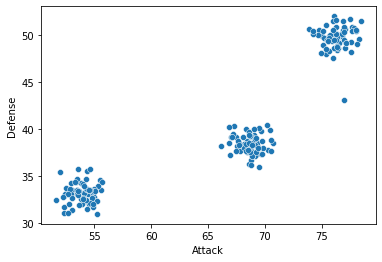

In [15]:
sns.scatterplot(x=df.Attack,y=df.Defense)

C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

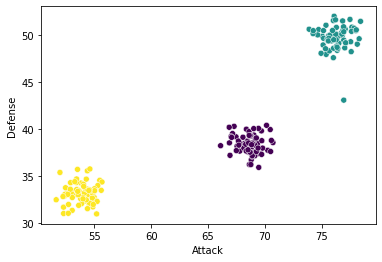

In [17]:
k_means = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
k_means.fit(X)
predictions = k_means.predict(X)
predictions = k_means.labels_# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
df['Cluster_k3'] = predictions
sns.scatterplot(x=df.Attack,y=df.Defense,c=predictions)

C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

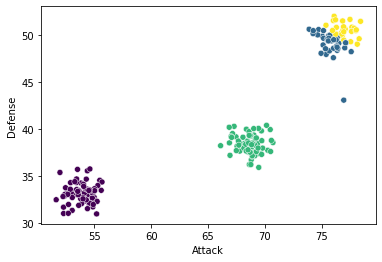

In [18]:
# инициализируем алгоритм k-means с количеством кластеров 4
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)

# запустим обучение модели
kmeans.fit(X)

# предскажем, к какому кластеру принадлежат покемоны
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, то можно просто попросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k4'] = predictions

#визуализируем результаты, параметр c принимает вектор с номерами классов для группировки объектов по цветам
sns.scatterplot(x=df.Attack, y=df.Defense, c=df.Clusters_k4)

In [19]:
# добавляем третий признак — скорость покемона, алгоритм такой же
X = df[['Attack', 'Defense', 'Speed']]

# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)

# запускаем обучение модели
kmeans.fit(X)

# предсказываем, к какому кластеру принадлежат покемоны
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Метод локтя

C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\clust

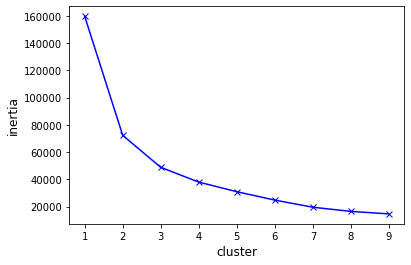

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

# функция, которая принимает количество кластеров для k-means и матрицу с признаками объектов и возвращает инерцию
def get_inertia(cluster_num, X):
# инициализируем алгоритм кластеризации
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
# запускаем алгоритм k-means
    k_means.fit(X)
# находим значение инерции
    inertia = k_means.inertia_
# возвращаем значение инерции
    return inertia

# создаём пустой список для значений инерции
inertia = []
# итерируемся по разным размерам кластеров (от 1 до 9) и сохраняем значение инерции для каждого кластера
for cluster_num in range(1, 10):
# сохраняем значения
    inertia.append(get_inertia(cluster_num, X))

# визуализируем, как менялась инерция в зависимости от количества кластеров
# задаём названия осям x и y
plt.xlabel("cluster", fontsize=12)
plt.ylabel("inertia", fontsize=12)
# рисуем изменение инерции
plt.plot([i for i in range(1, 10)], inertia, 'xb-')

Коэффициент силуэта

C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\clust

<AxesSubplot:xlabel='cluster', ylabel='silhouette'>

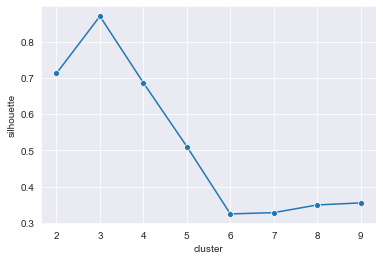

In [21]:
# импортируем метрику силуэта
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные
X = df[['Attack', 'Defense']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

In [22]:
df = pd.read_csv('Data/values_from_the_instrument.csv')
df.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\clust

<AxesSubplot:xlabel='cluster', ylabel='silhouette'>

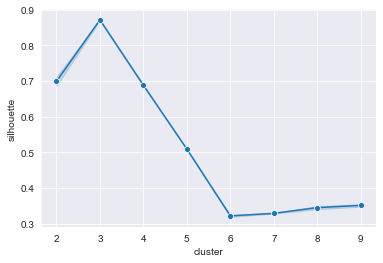

In [23]:
X = df
for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

In [26]:
# импортируем подсчёт метрики однородности кластеров
from sklearn.metrics.cluster import homogeneity_score

# передаем предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1]))
print(homogeneity_score(labels_true=[0, 0, 1, 1], labels_pred=[1, 1, 0, 0]))

1.0
1.0


ПОЛНОТА КЛАСТЕРА (COMPLETENESS SCORE)
Значение данной метрики показывает, насколько кластер заполнен объектами, которые в действительности должны принадлежать к этому кластеру.

In [27]:
# импортируем метрику полноты
from sklearn.metrics.cluster import completeness_score

# передаём предсказанную информацию (к какому кластеру относятся объекты датасета) и правильные ответы, подсчитываем метрику
completeness_score(labels_true=[0, 0, 1, 1], labels_pred=[0, 0, 1, 1])

1.0

Значение V-меры варьируется от 0 до 1. Метрика будет равна 1 только в том случае, если кластеры будут однородными и полными одновременно.

 Метрику однородности кластера при кластеризации можно сравнить с метрикой precision из задачи классификации: метрика однородности также показывает, насколько точно мы предсказали, к какому классу принадлежит объект. Метрика полноты так же, как метрика recall из задачи классификации, показывает, насколько мы наполнили кластеры теми объектами, которые должны принадлежать к данным кластерам.

In [ ]:
# from sklearn.metrics import v_measure_score
#
# # посчитаем V-меру для кластеров с покемонами
# print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k3))
# >1.0
#
# print(v_measure_score(labels_true=df.RealClusters, labels_pred=df.Clusters_k4))
# >0.9070246789753754

Индекс Рэнда
Данный индекс сравнивает предсказанный датасет и размеченные данные и подсчитывает, сколько образовалось пар объектов, которые оказались в одном кластере (number of agreeing pairs), среди предсказанных и размеченных данных.

In [29]:
# импортируем из библиотеки sklearn подсчёт индекса Рэнда
from sklearn.metrics.cluster import rand_score
# передаём в rand_score размеченные и предсказанные данные
rand_score([0, 0, 1, 1], [0, 0, 1, 1])
1.0

1.0

In [30]:
print(homogeneity_score(labels_true=[1, 2, 2, 1, 0], labels_pred=[1, 0, 2, 1, 2]))

0.737175493807016


In [34]:
df = pd.read_csv('Data/pokemon.csv')
X = df[['Attack','Defense']]
X

,Attack,Defense
0,77.634658,50.854702
1,67.454273,39.202323
2,76.007423,47.605846
3,77.828031,50.744911
4,68.658104,37.890027
...,...,...
201,75.932190,50.498392
202,76.919520,50.361511
203,76.038055,49.515184
204,66.854449,40.217467


In [35]:
from sklearn.cluster import AgglomerativeClustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=2)
agglomerative_clustering.fit(X)
agglomerative_clustering.labels_

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

EM-алгоритмы кластеризации

In [42]:
# импортируем библиотеки numpy и sklearn
import numpy as np
from sklearn.mixture import GaussianMixture

gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)

C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

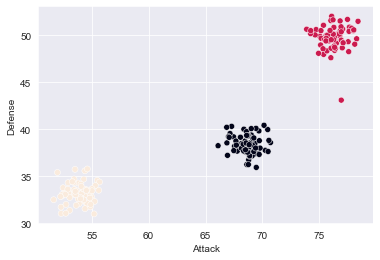

In [44]:
sns.scatterplot(x=X.Attack,y=X.Defense, c=gm_prediction)

In [47]:
df = pd.read_csv('../Data/housing.csv')
X = df
df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

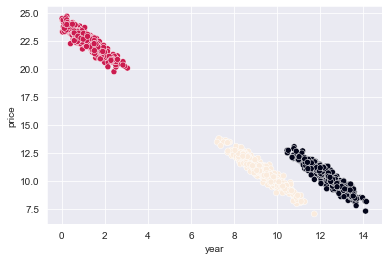

In [50]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель
gm_clustering.fit(X)

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(X)
sns.scatterplot(x=X.year,y=X.price, c=gm_prediction)

C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='price'>

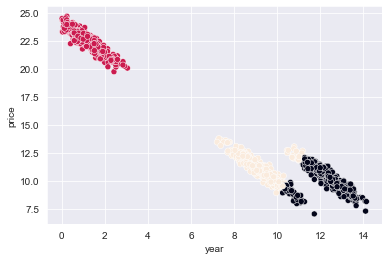

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X)
predictions = kmeans.predict(X)
predictions = kmeans.labels_
sns.scatterplot(x=X.year,y=X.price, c=predictions)

C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\Denis\anaconda3\envs\pythonProject1\lib\site-packages\sklearn\clust

<AxesSubplot:xlabel='cluster', ylabel='silhouette'>

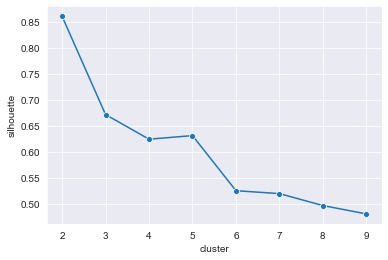

In [51]:
from sklearn.metrics import silhouette_score

# напишем функцию, как и при подсчете метода локтя
def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, init='k-means++', n_init=10, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

# создадим пустой словарь, ключами будут инерция и количество кластеров
silhouette_res = {"silhouette": [], "cluster": []}

# выберем нужные данные
X = df[['year', 'price']]

for cluster_num in range(2, 10):
    silhouette_res["silhouette"].append(get_silhouette(cluster_num, X))
    silhouette_res["cluster"].append(cluster_num)

# сохраним в датафрейм значение силуэта и количество кластеров
silhouette_df = pd.DataFrame(silhouette_res)

# установим стиль для визуализиции
sns.set_style("darkgrid")
# визуализируем зависимость значения инерции от количества кластеров
sns.lineplot(data=silhouette_df, x="cluster", y="silhouette", marker= "o")

Спектральная кластеризация